## Problem 4
Given the data in problem4.csv
- A. Simulate an MA(1), MA(2), and MA(3) process and graph the ACF and PACF of each. What do you notice?
- B. Simulate an AR(1), AR(2), and AR(3) process and graph the ACF and PACF of each. What do you notice?
- C. Examine the data in problem4.csv. What AR/MA process would you use to model the data? Why?
- D. Fit the model of your choice in C along with other AR/MA models. Compare the AICc of each. What is the best fit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

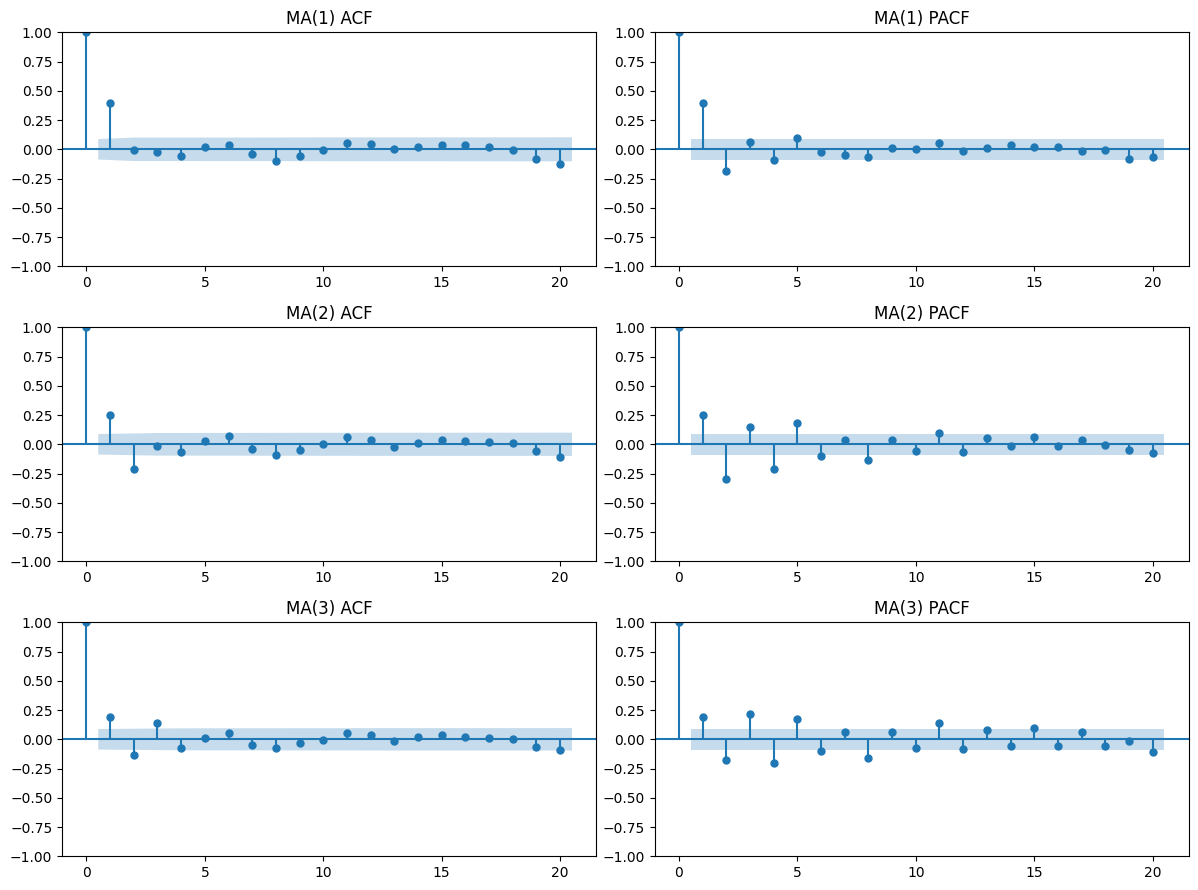

In [2]:
def simulate_ma(q, theta, n=500):
    np.random.seed(42)
    epsilon = np.random.normal(0, 1, n)
    X = np.zeros(n)
    
    for t in range(q, n):
        X[t] = epsilon[t] + sum(theta[i] * epsilon[t - i - 1] for i in range(q))
    
    return X

# Simulate MA(1), MA(2), MA(3)
ma1 = simulate_ma(1, [0.5])
ma2 = simulate_ma(2, [0.5, -0.3])
ma3 = simulate_ma(3, [0.5, -0.3, 0.2])

# Draw ACF and PACF
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
for i, (data, title) in enumerate(zip([ma1, ma2, ma3], ["MA(1)", "MA(2)", "MA(3)"])):
    sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[i, 0], title=f"{title} ACF")
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[i, 1], title=f"{title} PACF")

plt.tight_layout()
plt.show()

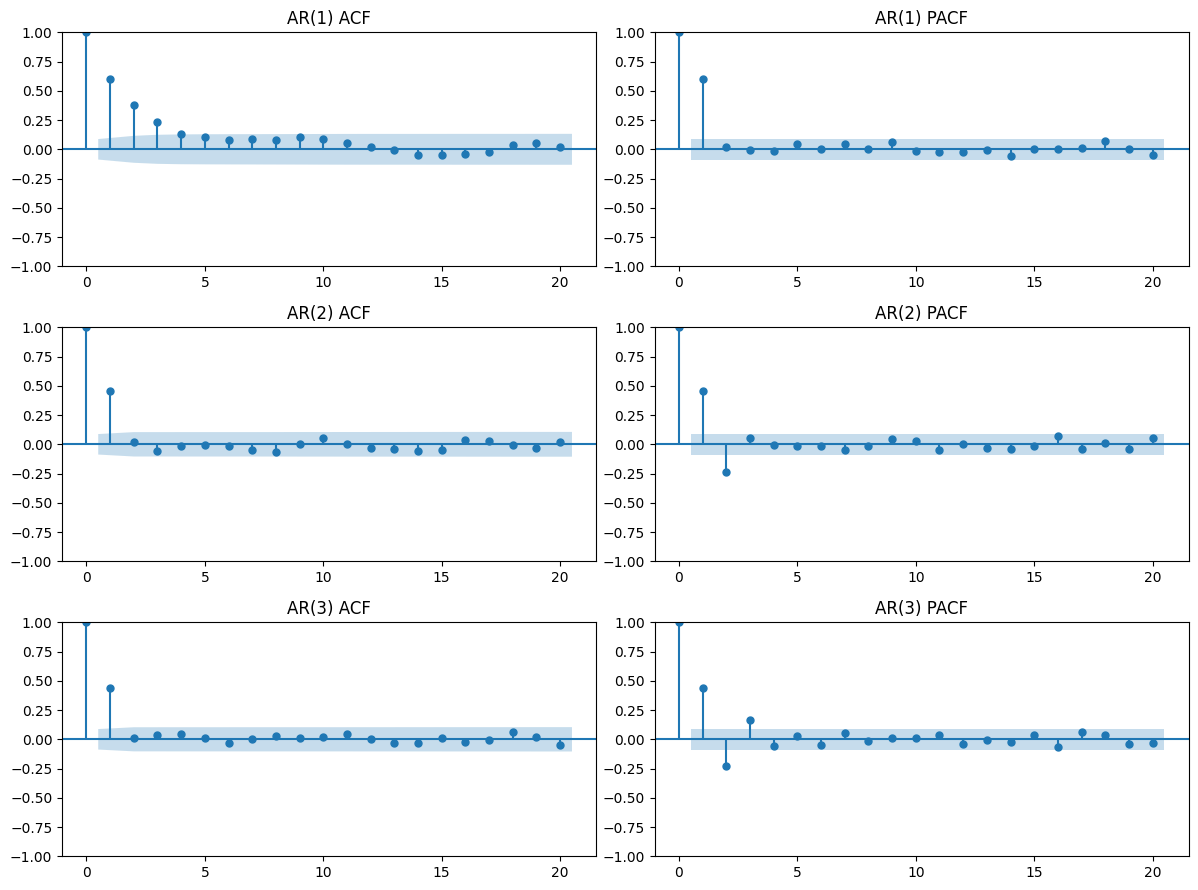

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

def simulate_ar(p, phi, n=500):
    ar = np.r_[1, -np.array(phi)]  # Coefficients of the AR process
    ma = np.r_[1]  # MA(0) process
    ar_process = ArmaProcess(ar, ma)
    return ar_process.generate_sample(nsample=n)

# Simulate AR(1), AR(2), AR(3)
ar1 = simulate_ar(1, [0.6])
ar2 = simulate_ar(2, [0.6, -0.3])
ar3 = simulate_ar(3, [0.6, -0.3, 0.2])

# Draw ACF and PACF
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
for i, (data, title) in enumerate(zip([ar1, ar2, ar3], ["AR(1)", "AR(2)", "AR(3)"])):
    sm.graphics.tsa.plot_acf(data, lags=20, ax=axes[i, 0], title=f"{title} ACF")
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=axes[i, 1], title=f"{title} PACF")

plt.tight_layout()
plt.show()

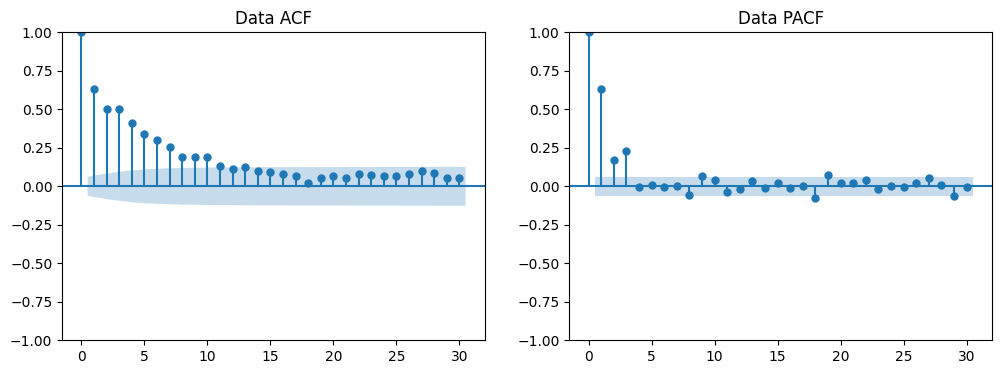

In [4]:
import pandas as pd
# Read data
data = pd.read_csv("problem4.csv")

# Drwa ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=30, ax=axes[0], title="Data ACF")
sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=30, ax=axes[1], title="Data PACF")

plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.values.squeeze())
print(f"ADF 检验 p-value: {result[1]}")

ADF 检验 p-value: 1.293443719981419e-13


In [6]:
# Extract time series data
ts = data['y']

# Define a function to calculate AICc
def calculate_aicc(model, p, q):
    n = len(ts)
    aic = model.aic
    aicc = aic + (2 * (p + q) * (p + q + 1)) / (n - p - q - 1)
    return aicc

# Fit AR(1), AR(2), AR(3) models and calculate AICc
ar_models = []
for p in [1, 2, 3]:
    model = ARIMA(ts, order=(p, 0, 0)).fit()
    aicc = calculate_aicc(model, p, 0)
    ar_models.append((f'AR({p})', aicc))

# Fit MA(1), MA(2), MA(3) models and calculate AICc
ma_models = []
for q in [1, 2, 3]:
    model = ARIMA(ts, order=(0, 0, q)).fit()
    aicc = calculate_aicc(model, 0, q)
    ma_models.append((f'MA({q})', aicc))

# Combine the results of AR and MA models
all_models = ar_models + ma_models

# Find the model with the minimum AICc
best_model = min(all_models, key=lambda x: x[1])

# Output the results
print("Model AICc values:")
for model, aicc in all_models:
    print(f"{model}: {aicc}")

print(f"\nThe best model is {best_model[0]} with AICc = {best_model[1]}")

Model AICc values:
AR(1): -1669.0852593293716
AR(2): -1696.079649387366
AR(3): -1746.2576245169637
MA(1): -1508.9230252238815
MA(2): -1559.238895762558
MA(3): -1645.1088725670288

The best model is AR(3) with AICc = -1746.2576245169637
